In [2]:
# Standard Python modules
import os, sys
import yaml
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
# plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns
from IPython.display import Image, display

# Path to modules
sys.path.append('../modules')
# Import my modules
from teleconnections import AO_index

In [3]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures



In [4]:
yaml_doc = '../data/config.yml'

config = yaml.load(open(yaml_doc), Loader=yaml.SafeLoader)
# djf_dict mam_dict djfmam_dict
ssn = 'djf'
ar_dict = config[ssn]

In [5]:
#SH Index
fname = path_to_out + 'SH_index_ERA5_1979_2019.csv'
df_SH = pd.read_csv(fname, engine='python')
# df_SH

In [6]:
## AO Index
ref = 'daily'
df = AO_index(ref, path_to_data)

# Trim date range
idx = (df.index >= ar_dict['start_date']) & (df.index <= ar_dict['end_date'])
df = df.loc[idx]
# Select months
if ar_dict['mon_s'] > ar_dict['mon_e']:
    idx = (df.MON >= ar_dict['mon_s']) | (df.MON <= ar_dict['mon_e'])
else:
    idx = (df.MON >= ar_dict['mon_s']) & (df.MON <= ar_dict['mon_e'])

df = df.loc[idx]

## resamples data to quarterly
df_ao = df.ANOM.resample('QS-DEC').mean()
df_ao = df_ao.dropna()
df_ao

date
1979-12-01   -0.540319
1980-12-01   -0.157289
1981-12-01   -0.405189
1982-12-01    0.230856
1983-12-01    0.265440
1984-12-01   -1.216011
1985-12-01   -1.706944
1986-12-01   -0.803467
1987-12-01   -0.416220
1988-12-01    2.573289
1989-12-01    1.139078
1990-12-01    0.401422
1991-12-01    1.055374
1992-12-01    1.756789
1993-12-01   -0.388844
1994-12-01    0.674467
1995-12-01   -1.043165
1996-12-01   -0.156778
1997-12-01   -0.769800
1998-12-01    0.630778
1999-12-01    1.090549
2000-12-01   -1.287511
2001-12-01    0.410589
2002-12-01   -0.647300
2003-12-01   -0.936604
2004-12-01    0.145589
2005-12-01   -0.802378
2006-12-01    1.041344
2007-12-01    0.834154
2008-12-01    0.278978
2009-12-01   -3.272989
2010-12-01   -0.960522
2011-12-01    0.657165
2012-12-01   -1.133033
2013-12-01    0.181167
2014-12-01    0.812556
2015-12-01   -0.011670
2016-12-01    1.008244
2017-12-01   -0.039921
Name: ANOM, dtype: float64

In [7]:
# PDO monthly index
df = pd.read_csv(path_to_data+'teleconnection_indices/NOAA_PDO_index.csv',
                 engine='python', skiprows=1)
df['date'] = pd.date_range('1854-01', '2020-07', freq='MS')
df = df.set_index('date')
# df = df.loc[(df.index.year >= 1979) & (df.index.year <= 2018)]

# # Trim date range
idx = (df.index >= ar_dict['start_date']) & (df.index <= ar_dict['end_date'])
df = df.loc[idx]

# Select months
if ar_dict['mon_s'] > ar_dict['mon_e']:
    idx = (df.index.month >= ar_dict['mon_s']) | (df.index.month <= ar_dict['mon_e'])
else:
    idx = (df.index.month >= ar_dict['mon_s']) & (df.index.month <= ar_dict['mon_e'])

df = df.loc[idx]

## resamples data to quarterly
df_pdo = df.Value.resample('QS-DEC').mean()
df_pdo = df_pdo.dropna()
df_pdo

date
1979-12-01    0.233333
1980-12-01    0.906667
1981-12-01    0.170000
1982-12-01    0.510000
1983-12-01    1.456667
1984-12-01    0.610000
1985-12-01    0.946667
1986-12-01    1.546667
1987-12-01    0.546667
1988-12-01   -0.943333
1989-12-01   -0.600000
1990-12-01   -1.703333
1991-12-01    0.013333
1992-12-01    0.023333
1993-12-01    0.616667
1994-12-01   -1.020000
1995-12-01    0.820000
1996-12-01    0.233333
1997-12-01    1.186667
1998-12-01   -0.976667
1999-12-01   -1.800000
2000-12-01    0.156667
2001-12-01   -1.016667
2002-12-01    1.416667
2003-12-01   -0.453333
2004-12-01   -0.266667
2005-12-01    0.273333
2006-12-01   -0.606667
2007-12-01   -1.276667
2008-12-01   -1.633333
2009-12-01   -0.070000
2010-12-01   -1.766667
2011-12-01   -1.866667
2012-12-01   -1.276667
2013-12-01   -0.676667
2014-12-01    1.626667
2015-12-01    0.770000
2016-12-01    0.180000
2017-12-01    0.100000
Name: Value, dtype: float64

In [8]:
# ENSO INDEX
df = pd.read_csv(path_to_data+'teleconnection_indices/CPC_NCEP_NOAA_ONI.txt',
                delim_whitespace=True, engine='python')
df['date'] = pd.date_range('1949-12', '2019-08', freq='MS')
df = df.set_index('date')
df['NINOCOND'] = df['ANOM']
df.loc[df['ANOM']>=0.5, 'NINOCOND'] = 1
df.loc[df['ANOM']< 0.5, 'NINOCOND'] = 0

df['NINACOND'] = df['ANOM']
df.loc[df['ANOM']<=-0.5, 'NINACOND'] = 1
df.loc[df['ANOM']> -0.5, 'NINACOND'] = 0

df['ninocount'] = df['NINOCOND'].rolling(min_periods=1, window=9, center=True).sum()
df['ninacount'] = df['NINACOND'].rolling(min_periods=1, window=9, center=True).sum()

# set conditions neutral=0, nino=1, nina=2
df['COND'] = 0
df.loc[df['ninocount']>=5, 'COND'] = 1
df.loc[df['ninacount']>=5, 'COND'] = 2

## Fix a couple weird ones
seasons = ['ASO', 'JFM', 'JJA', 'JAS', 'ASO', 'SON']
yrs = [1984, 1984, 2008, 2008, 2008, 2008]

for i in np.arange(6):
    df.loc[(df['SEAS'] == seasons[i]) & (df['YR'] == yrs[i]), 'COND'] = 0

df = df.loc[(df.index.year >= 1979) & (df.index.year <= 2018)]
df

# Select months
if ar_dict['mon_s'] > ar_dict['mon_e']:
    idx = (df.index.month >= ar_dict['mon_s']) | (df.index.month <= ar_dict['mon_e'])
else:
    idx = (df.index.month >= ar_dict['mon_s']) & (df.index.month <= ar_dict['mon_e'])

df = df.loc[idx]

## resamples data to quarterly
df_enso = df.ANOM.resample('QS-DEC').mean()
df_enso = df_enso.dropna()
df_enso

date
1978-12-01    0.135000
1979-12-01    0.463333
1980-12-01   -0.410000
1981-12-01    0.070000
1982-12-01    1.880000
1983-12-01   -0.453333
1984-12-01   -0.886667
1985-12-01   -0.423333
1986-12-01    1.160000
1987-12-01    0.496667
1988-12-01   -1.400000
1989-12-01    0.210000
1990-12-01    0.296667
1991-12-01    1.606667
1992-12-01    0.296667
1993-12-01    0.100000
1994-12-01    0.736667
1995-12-01   -0.746667
1996-12-01   -0.320000
1997-12-01    1.870000
1998-12-01   -1.306667
1999-12-01   -1.380000
2000-12-01   -0.546667
2001-12-01   -0.010000
2002-12-01    0.643333
2003-12-01    0.303333
2004-12-01    0.556667
2005-12-01   -0.643333
2006-12-01    0.333333
2007-12-01   -1.400000
2008-12-01   -0.670000
2009-12-01    1.266667
2010-12-01   -1.096667
2011-12-01   -0.643333
2012-12-01   -0.316667
2013-12-01   -0.300000
2014-12-01    0.593333
2015-12-01    2.146667
2016-12-01   -0.066667
2017-12-01   -0.743333
2018-12-01    0.810000
Name: ANOM, dtype: float64

In [9]:
fname_id = 'HUV500t0120050cor'
filepath = path_to_out + fname_id + 'hma_AR-types-' + ssn + '.csv'
df = pd.read_csv(filepath)

# set up datetime index
df['DATE'] = pd.to_datetime(df['Unnamed: 0'])
dates = df.DATE.values
df = df.drop(columns=['Unnamed: 0'])
df = df.set_index('DATE')

df

,AR_CAT
DATE,
1979-12-01 09:00:00,3
1979-12-02 09:00:00,3
1979-12-03 09:00:00,0
1979-12-04 09:00:00,0
1979-12-05 09:00:00,0
...,...
2018-02-24 09:00:00,0
2018-02-25 09:00:00,0
2018-02-26 09:00:00,1


In [10]:
## Total typecount (1979-2018)

artypes = df.AR_CAT.values
typelist = [1, 2, 3]
ntypes = len(typelist)

# method 1
type_count1 = df['AR_CAT'].value_counts()
print(type_count1)

# method 2
type_count2 = np.empty(ntypes, dtype=int)
for k, cat in enumerate(typelist):
    idx = (artypes == cat)
    tmp = artypes[idx]
    type_count2[k] = len(tmp) 
    print(cat, type_count2[k])

# percentages
totdays = np.sum(type_count2)
type_freq = type_count2 / totdays
print(type_freq*100)


0    3149
3     160
2     108
1     103
Name: AR_CAT, dtype: int64
1 103
2 108
3 160
[27.76280323 29.11051213 43.12668464]


In [11]:
## Count number of each AR type per year

years = np.arange(1979, 2019)   # list of years
nyrs = len(years)-1               # number of years
typecount_per_yr = np.empty((nyrs,ntypes))

# Loop to count and tag AR events each year
for i in range(nyrs):
    # index first and last day of season
    start_date = pd.to_datetime("{0}-{1}-{2} 9:00".format(years[i], ar_dict['mon_s'], ar_dict['day_s']))
    end_date = pd.to_datetime("{0}-{1}-{2} 9:00".format(years[i+1], ar_dict['mon_e'], ar_dict['day_e']))
    # select rows by date using df.loc[start_date:end_date]
    tmp = df.loc[start_date:end_date]
    # extract ar time series
    x = tmp['AR_CAT'].values
    
    # loop to count frequency of each AR type
    for j, cat in enumerate(typelist):
        idx = (x == cat)
        tmp = x[idx]
        typecount_per_yr[i,j] = len(tmp)
        

In [12]:
# Convert annual counts of each type from array to pd dataframe

data = {'years':years[0:-1],
        'ar_type1': typecount_per_yr[:,0],
        'ar_type2': typecount_per_yr[:,1],
        'ar_type3': typecount_per_yr[:,2]}

df_ann= pd.DataFrame(data)
df_ann['ar_typeall'] = df_ann['ar_type1'] + df_ann['ar_type2'] + df_ann['ar_type3']
# df_ann
df_ann.describe()

,years,ar_type1,ar_type2,ar_type3,ar_typeall
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1998.000000,2.641026,2.743590,4.102564,9.487179
std,11.401754,2.133532,2.160872,3.447309,5.046478
min,1979.000000,0.000000,0.000000,0.000000,3.000000
25%,1988.500000,1.000000,1.000000,1.500000,6.000000
50%,1998.000000,2.000000,3.000000,3.000000,8.000000
75%,2007.500000,4.000000,4.000000,6.000000,12.000000
max,2017.000000,10.000000,9.000000,17.000000,25.000000


In [13]:
# combine ar annual df with ao annual df
print(len(df_ann), len(df_ao), len(df_SH.SH[1:-1]), len(df_pdo), len(df_enso[1:-1]))

39 39 39 39 39


In [14]:
if ssn == 'djf':
    df_ann['AO_ANOM'] = df_ao.values
    df_ann['SH'] = df_SH.SH[1:-1].values
    df_ann['PDO'] = df_pdo.values
    df_ann['ENSO'] = df_enso[1:-1].values
elif ssn == 'mam':
    df_ann['AO_ANOM'] = df_ao.values[:-1]
df_ann

,years,ar_type1,ar_type2,ar_type3,ar_typeall,AO_ANOM,SH,PDO,ENSO
0,1979,1.0,1.0,6.0,8.0,-0.540319,0.048904,0.233333,0.463333
1,1980,1.0,1.0,3.0,5.0,-0.157289,0.454855,0.906667,-0.410000
2,1981,4.0,0.0,2.0,6.0,-0.405189,-0.417967,0.170000,0.070000
3,1982,0.0,0.0,6.0,6.0,0.230856,-0.399910,0.510000,1.880000
4,1983,2.0,5.0,0.0,7.0,0.265440,1.106675,1.456667,-0.453333
5,1984,1.0,3.0,3.0,7.0,-1.216011,0.402287,0.610000,-0.886667
6,1985,1.0,1.0,4.0,6.0,-1.706944,0.850973,0.946667,-0.423333
7,1986,1.0,0.0,5.0,6.0,-0.803467,-0.807531,1.546667,1.160000
8,1987,2.0,3.0,5.0,10.0,-0.416220,0.313797,0.546667,0.496667
9,1988,1.0,4.0,7.0,12.0,2.573289,-1.165476,-0.943333,-1.400000


In [17]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [18]:
## correlations between indices and AR frequency
corrMatrix = df_ann.corr()
# USE pandas.options TO DISPLAY FLOATS TO TWO DECIMAL PLACES
pd.options.display.float_format = "{:,.2f}".format
corrMatrix

,years,ar_type1,ar_type2,ar_type3,ar_typeall,AO_ANOM,SH,PDO,ENSO
years,1.00,0.16,0.11,-0.19,-0.02,-0.01,0.20,-0.31,-0.09
ar_type1,0.16,1.00,-0.05,-0.11,0.33,-0.27,0.03,0.12,0.19
ar_type2,0.11,-0.05,1.00,0.43,0.70,0.31,-0.03,-0.15,0.12
ar_type3,-0.19,-0.11,0.43,1.00,0.82,0.30,-0.22,0.01,0.31
ar_typeall,-0.02,0.33,0.70,0.82,1.00,0.22,-0.15,-0.00,0.35
AO_ANOM,-0.01,-0.27,0.31,0.30,0.22,1.00,-0.26,-0.32,-0.16
SH,0.20,0.03,-0.03,-0.22,-0.15,-0.26,1.00,-0.02,-0.24
PDO,-0.31,0.12,-0.15,0.01,-0.00,-0.32,-0.02,1.00,0.44
ENSO,-0.09,0.19,0.12,0.31,0.35,-0.16,-0.24,0.44,1.00


In [19]:
# calculate two-tailed pvalues with F test
pval = calculate_pvalues(df_ann)
pval

,years,ar_type1,ar_type2,ar_type3,ar_typeall,AO_ANOM,SH,PDO,ENSO
years,0.00,0.32,0.51,0.23,0.91,0.96,0.21,0.05,0.60
ar_type1,0.32,0.00,0.77,0.52,0.04,0.10,0.86,0.45,0.25
ar_type2,0.51,0.77,0.00,0.01,0.00,0.06,0.87,0.36,0.47
ar_type3,0.23,0.52,0.01,0.00,0.00,0.07,0.19,0.94,0.05
ar_typeall,0.91,0.04,0.00,0.00,0.00,0.18,0.37,0.98,0.03
AO_ANOM,0.96,0.10,0.06,0.07,0.18,0.00,0.11,0.05,0.34
SH,0.21,0.86,0.87,0.19,0.37,0.11,0.00,0.89,0.15
PDO,0.05,0.45,0.36,0.94,0.98,0.05,0.89,0.00,0.00
ENSO,0.60,0.25,0.47,0.05,0.03,0.34,0.15,0.00,0.00


In [21]:
## 5 year rolling mean
data_roll = df_ann.rolling(5).mean()

## correlations between indices and AR frequency
corrMatrix = data_roll.corr()
corrMatrix

,years,ar_type1,ar_type2,ar_type3,ar_typeall,AO_ANOM,SH,PDO,ENSO
years,1.00,0.39,0.11,-0.38,-0.09,-0.16,0.40,-0.63,-0.29
ar_type1,0.39,1.00,0.32,0.20,0.51,0.21,-0.23,-0.35,0.23
ar_type2,0.11,0.32,1.00,0.58,0.82,0.55,-0.40,-0.37,0.40
ar_type3,-0.38,0.20,0.58,1.00,0.89,0.71,-0.64,-0.07,0.46
ar_typeall,-0.09,0.51,0.82,0.89,1.00,0.70,-0.61,-0.28,0.50
AO_ANOM,-0.16,0.21,0.55,0.71,0.70,1.00,-0.74,-0.09,0.43
SH,0.40,-0.23,-0.40,-0.64,-0.61,-0.74,1.00,0.01,-0.36
PDO,-0.63,-0.35,-0.37,-0.07,-0.28,-0.09,0.01,1.00,0.46
ENSO,-0.29,0.23,0.40,0.46,0.50,0.43,-0.36,0.46,1.00


In [22]:
# calculate two-tailed pvalues with F test
pval = calculate_pvalues(data_roll)
pval

,years,ar_type1,ar_type2,ar_type3,ar_typeall,AO_ANOM,SH,PDO,ENSO
years,0.00,0.02,0.54,0.02,0.61,0.34,0.02,0.00,0.09
ar_type1,0.02,0.00,0.06,0.24,0.00,0.23,0.18,0.04,0.19
ar_type2,0.54,0.06,0.00,0.00,0.00,0.00,0.02,0.03,0.02
ar_type3,0.02,0.24,0.00,0.00,0.00,0.00,0.00,0.71,0.01
ar_typeall,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00
AO_ANOM,0.34,0.23,0.00,0.00,0.00,0.00,0.00,0.59,0.01
SH,0.02,0.18,0.02,0.00,0.00,0.00,0.00,0.96,0.03
PDO,0.00,0.04,0.03,0.71,0.11,0.59,0.96,0.00,0.01
ENSO,0.09,0.19,0.02,0.01,0.00,0.01,0.03,0.01,0.00


In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.autocorr.html
# calculate p-value based on autocorrelation

In [14]:
# melt to do one plot with ar type as hue
df1 = pd.melt(df_ann, id_vars=['years'], var_name='ar_type', value_name='frequency')
df1

,years,ar_type,frequency
0,1979,ar_type1,1.000000
1,1980,ar_type1,1.000000
2,1981,ar_type1,4.000000
3,1982,ar_type1,0.000000
4,1983,ar_type1,2.000000
...,...,...,...
307,2013,ENSO,-0.300000
308,2014,ENSO,0.593333
309,2015,ENSO,2.146667
310,2016,ENSO,-0.066667


<Figure size 432x288 with 0 Axes>

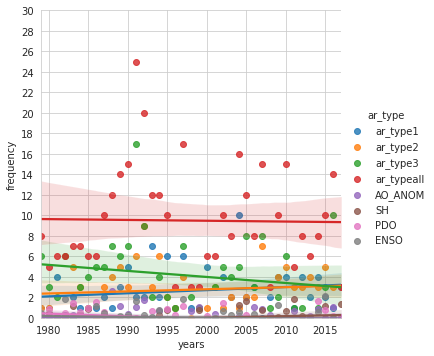

In [15]:
# set seaborn style
          
sns.set_style("whitegrid")
sns.despine()
#sns.set_style("ticks", {'patch.force_edgecolor':False})
# plot time series

sns_plot = sns.lmplot(x='years',y='frequency', hue='ar_type', data=df1)
yticks=np.arange(0,32,2)
plt.ylim(0,30)
plt.yticks(yticks)

outfile = path_to_figs + 'artype_trends_' + ssn + '.png'
sns_plot.savefig(outfile)


/home/nash/DATA/repositories/AR_types/figs/artype_ao_5yrmean_djf.png


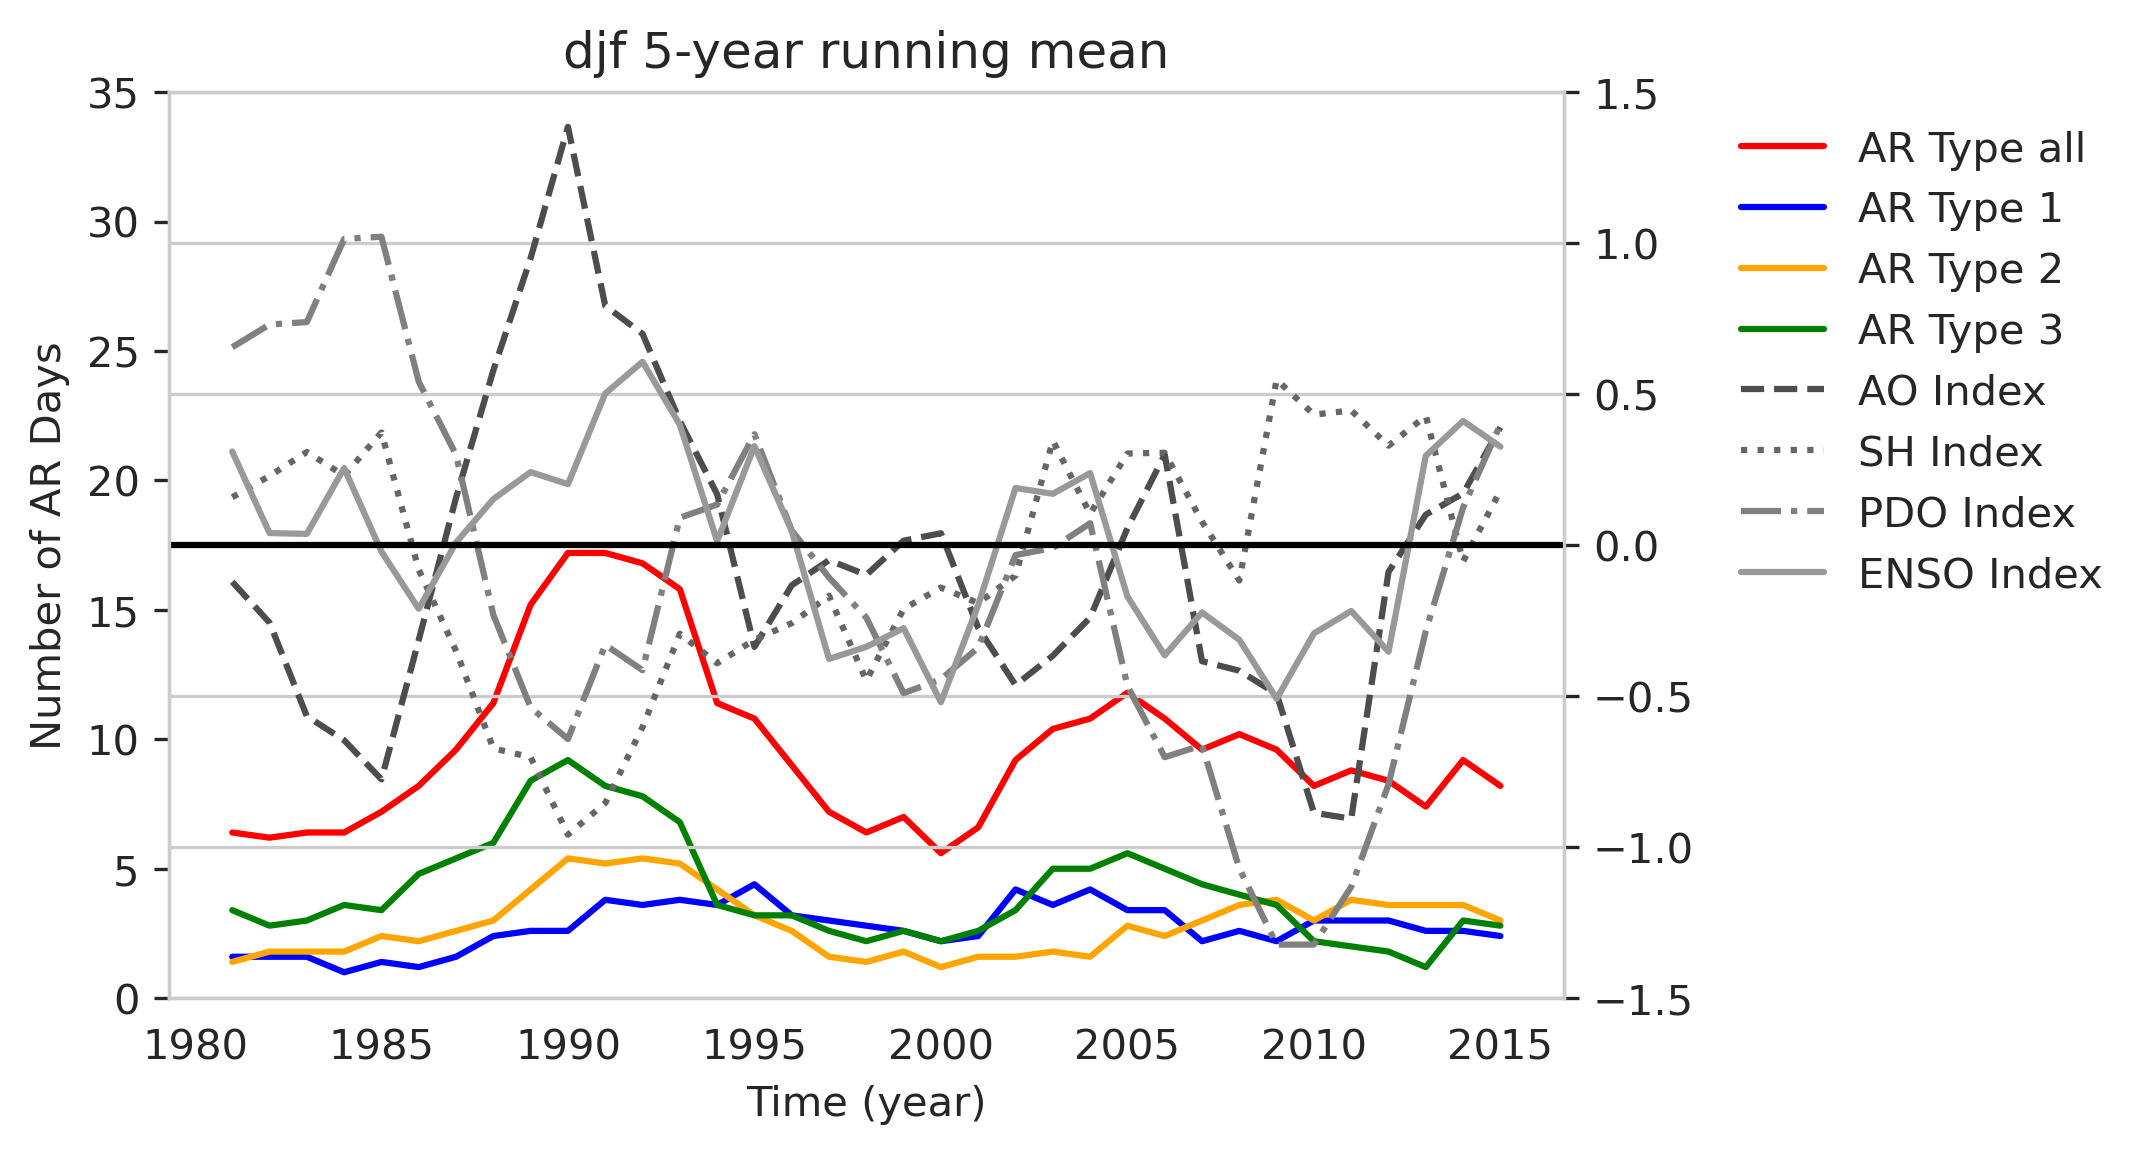

<Figure size 1800x1200 with 0 Axes>

In [17]:

# data to plot
time = data_roll.years
ar_all = data_roll.ar_typeall
ar_1 = data_roll.ar_type1
ar_2 = data_roll.ar_type2
ar_3 = data_roll.ar_type3
ao = data_roll.AO_ANOM
sh = data_roll.SH
pdo = data_roll.PDO
enso = data_roll.ENSO

# set up figure
outfile = path_to_figs + 'artype_ao_5yrmean_' + ssn + '.png'
fig = plt.figure()
# fig.set_size_inches((12.0,3.0))
fig.dpi = 300

ax = fig.add_subplot(111)
# lines on left axis
lns1 = ax.plot(time, ar_all, color='red', label='AR Type all')
lns2 = ax.plot(time, ar_1, color="blue", label='AR Type 1')
lns3 = ax.plot(time, ar_2, color="orange", label='AR Type 2')
lns4 = ax.plot(time, ar_3, color="green", label='AR Type 3')
ax.grid(False)
# lines on right axis
ax2 = ax.twinx()
lns5 = ax2.plot(time, ao, color=(0.6/2.0, 0.6/2.0, 0.6/2.0), linestyle='--', label='AO Index')
lns6 = ax2.plot(time, sh, color=(0.8/2.0, 0.8/2.0, 0.8/2.0), linestyle=':', label='SH Index')
lns7 = ax2.plot(time, pdo, color=(1./2.0, 1./2.0, 1./2.0), linestyle='-.', label='PDO Index')
lns8 = ax2.plot(time, enso, color=(1.2/2.0, 1.2/2.0, 1.2/2.0), linestyle='-', label='ENSO Index')
ax2.axhline(0, color='k')

# legend for all lines
lns = lns1+lns2+lns3+lns4+lns5+lns6+lns7+lns8
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, ncol=1, bbox_to_anchor=(1.1, 1), loc='upper left')

# labels
ax.set_xlabel("Time (year)")
ax.set_ylabel(r"Number of AR Days")
# ax2.set_ylabel(r"Index")
ax2.set_ylim(-1.5, 1.5)
ax.set_ylim(0,35)
plt.title(ssn+' 5-year running mean')

# Save the figure
fig.savefig(outfile, bbox_inches='tight', dpi=fig.dpi)
fig.clf()

print(outfile)
display(Image(outfile))